<a href="https://colab.research.google.com/github/lugsantistebanji/WCS-IA/blob/main/WCS_IA_Quetes_NLP_Introduction_to_text_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge


---

1. __Importe NLTK et télécharge les fonctions dont tu auras besoin (au fur et à mesure si nécessaire).__

In [54]:
import nltk
import pandas as pd
nltk.download('popular')
nltk.download('punkt_tab')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

---

2. __Récupère le texte d'un article de presse de ton choix sur internet (en anglais ce sera plus simple, mais tu peux prendre la langue de ton choix). Affecte-le à une variable via un copier/coller dans ton notebook. Par simplicité pour la suite de cette quête, nous te conseillons de prendre un texte qui fait entre 10 et 30 lignes environ.__

[AI Is Usually Bad At Math...](https://www.forbes.com/sites/johnwerner/2024/10/07/ai-is-usually-bad-at-math-heres-what-will-happen-if-it-gets-better/)

In [55]:
article = """We’re seeing some new developments in AI models that are shedding light on one of the technology’s most prominent gaps – its relative inability to do math well.

Some experts note that AI is dysfunctional at math. It tends to produce wrong answers, and can be slow to correct them.

The people at OpenAI are working on new models that are more geared towards solving math problems.

But it’s interesting to think about why there’s this deficit in the first place:

Some engineers like to talk about tokenization, and the use of data in large language models. What it seems to boil down to is that the models themselves are geared toward language, so they can produce. Shakespearean works of literature, but aren’t as good at solving math problems

But another element of this has to do with the higher-level human thought involved in doing math, and how it works.

Now, computers are great at calculating numbers in a deterministic way. You’re never going to go wrong consulting a computer on a sum, for instance: just ask the calculator. But when it comes to automation, the AI entities that we’re familiar with have trouble.

In the earlier models, ChatGPT and other utilities tended to produce, not accurate math answers, but answers that represented what might come next in language – as LLMs typically do. At present, a lot of this has been solved for simple addition, multiplication, etc. and ChatGPT can solve basic equations by, say, moving like terms around, but this only obscures the deeper issue: that the AI isn’t using the right methods.

“Math is really, really hard for AI models,” writes Melissa Heikkila at our own MIT Technology Review. “Complex math, such as geometry, requires sophisticated reasoning skills, and many AI researchers believe that the ability to crack it could herald more powerful and intelligent systems. Innovations like AlphaGeometry show that we are edging closer to machines with more human-like reasoning skills. This could allow us to build more powerful AI tools that could be used to help mathematicians solve equations and perhaps come up with better tutoring tools.”
"""

---

3. __Transforme ton texte en tokens de phrases.__

In [56]:
nltk.sent_tokenize(article)

['We’re seeing some new developments in AI models that are shedding light on one of the technology’s most prominent gaps – its relative inability to do math well.',
 'Some experts note that AI is dysfunctional at math.',
 'It tends to produce wrong answers, and can be slow to correct them.',
 'The people at OpenAI are working on new models that are more geared towards solving math problems.',
 'But it’s interesting to think about why there’s this deficit in the first place:\n\nSome engineers like to talk about tokenization, and the use of data in large language models.',
 'What it seems to boil down to is that the models themselves are geared toward language, so they can produce.',
 'Shakespearean works of literature, but aren’t as good at solving math problems\n\nBut another element of this has to do with the higher-level human thought involved in doing math, and how it works.',
 'Now, computers are great at calculating numbers in a deterministic way.',
 'You’re never going to go wron

---

4. __Transforme ton texte en tokens de mots.__

In [57]:
words = nltk.word_tokenize(article.lower())

---

5. __Compte la fréquence d'apparition de chaque mot et réalise un graphique (si possible un diagramme en barre) qui représente les 20 mots les plus présents dans ton texte. Y a-t-il beaucoup de mots qui te semblent être des stopwords ?__

In [62]:
import matplotlib.pyplot as plt


def get_bar_chart(x, height):
    plt.bar(x, height=height)
    plt.xlabel('Count')
    plt.ylabel('Word')
    plt.xticks(rotation=90)
    plt.title('Frequence of 20 words most used')
    plt.show()

In [59]:
def top_20(dict_words):
    return dict(sorted(dict_words.items(), key=itemgetter(1), reverse=True)[:20])

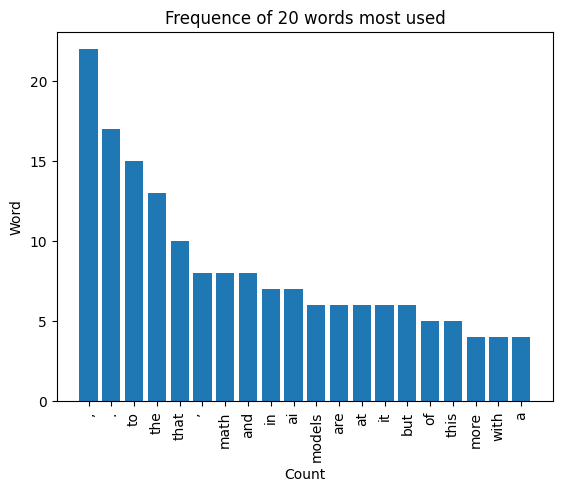

In [60]:
from operator import itemgetter

freq = nltk.FreqDist(words)
top_20_all = top_20(freq)
get_bar_chart(top_20_all.keys(), top_20_all.values())

    Oui, il y beaucoup des _stopwords_ like: to, the, and, in, are, it,...

---

6. __Enlève les stop words et la ponctuation, et regarde à nouveau quels sont les mots les plus présents. Là encore, réalise le même graphique pour comparer.__

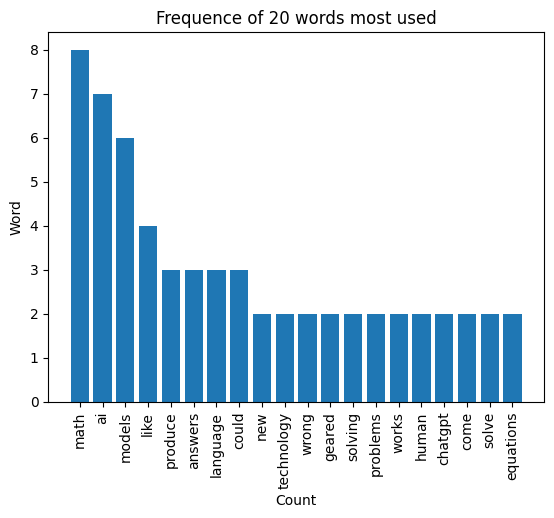

In [61]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
only_words = tokenizer.tokenize(article.lower())
without_stopwords = [word for word in only_words if word not in nltk.corpus.stopwords.words("english")]
new_freq = nltk.FreqDist(without_stopwords)
top_20_words = top_20(new_freq)
get_bar_chart(top_20_words.keys(), top_20_words.values())

---